# Yifu_He_190003956_Homework_1

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# define the function to calculate statistics
def mean_(arr):
    """
    Parameters
    ----------
    arr: np.array
        array of data
    
    Returns
    ----------
    res: float
        mean - first moment
    """
    res = sum(arr)/len(arr)
    return res

def std_deviation_(arr):
    """
    Parameters
    ----------
    arr: np.array
        array of data
    
    Returns
    ----------
    res: float
         standard deviation - second moment
    """
    x_head = mean_(arr)
    res = np.sqrt(sum( pow(arr-x_head,2))/ (len(arr) - 1))
    return res

def skewness_(arr):
    """
    Parameters
    ----------
    arr: np.array
        array of data
    
    Returns
    ----------
    res: float
         skewness - third moment
    """
    x_head = mean_(arr)
    sigma = std_deviation_(arr)
    mu_3 = sum( pow(arr - x_head,3)) / (len(arr)-1)
    res = mu_3/pow(sigma,3)
    return res

def kurtosis_(arr):
    """
    Parameters
    ----------
    arr: np.array
        array of data
    
    Returns
    ----------
    res: float
         kurtosis - fourth moment
    """
    x_head = mean_(arr)
    sigma = std_deviation_(arr)
    mu_4 = sum( pow(arr - x_head,4)) / (len(arr)-1)
    res = mu_4/pow(sigma,4)
    return res

def JB_test_(arr):
    """
    Parameters
    ----------
    arr: np.array
        array of data
    
    Returns
    ----------
    res: float
         Jarque-Bera statistic
    """
    T = len(arr)
    res = pow(skewness_(arr),2) * T / 6 + pow(kurtosis_(arr)-3,2) * T / 24
    return res
def Cov_(arr1,arr2):
    """
    Parameters
    ----------
    arr1: np.array
        array of data
    arr2: np.array
        array of data
    
    Returns
    ----------
    res: float
         Covariance
    """
    x_head = mean_(arr1)
    y_head = mean_(arr2)
    res = 0
    for i in range(len(arr1)):
        res +=(arr1[i] - x_head)(arr2[i] - y_head)
    return res/(len(arr1)-1)

In [3]:
def convert_type(x):
    """
    Parameters
    ----------
    x: np.int64
        date in type of int64 
    
    Returns
    ----------
    res: datetime.datetime
         date in type of datetime.datetime
    """    
    res = str(x)[:7]
    year = int(res[:4])
    month = int(res[4:6])+1
    if month > 12:
        month = 1
        year +=1
    res = datetime(year,month,1,0,0)
    return res

# set begin date and end date
begin_date = datetime(1998,12,1,0,0)
end_date = datetime(2018,12,1,0,0)

# import and preprocessing oil, gold and house data
oil = pd.read_excel("/Users/yifuhe/Learning/RBS/fin_model/homework1/OilPrice_Jan2020.xls")
gold = pd.read_excel("/Users/yifuhe/Learning/RBS/fin_model/homework1/GoldPriceData_Jan2020.xls")
house = pd.read_excel("/Users/yifuhe/Learning/RBS/fin_model/homework1/HousingData_Jan2020.xls")
CRSP = pd.read_csv("/Users/yifuhe/Learning/RBS/fin_model/homework1/Marker_value_weighted.csv")
Tbill_cpi = pd.read_csv("/Users/yifuhe/Learning/RBS/fin_model/homework1/tbill_cpi.csv")


oil = oil.iloc[10:,:]
oil.columns = ["date","oil_p"]
index = oil[(oil.date == begin_date) | (oil.date == end_date)].index.tolist()
oil = oil.loc[index[0]:index[1]].reset_index().drop("index",axis=1)

gold = gold.iloc[10:,:]
gold.columns = ["date","gold_p"]
index = gold[(gold.date == begin_date) | (gold.date == end_date)].index.tolist()
gold = gold.loc[index[0]:index[1]].reset_index().drop("index",axis=1)

house = house.iloc[10:,:]
house.columns = ["date","house_p"]
index = house[(house.date == begin_date) | (house.date == end_date)].index.tolist()
house = house.loc[index[0]:index[1]].reset_index().drop("index",axis=1)

CRSP["date"] = CRSP["caldt"].apply(convert_type)
CRSP = CRSP.loc[:,["date","vwretd","vwindd"]]
index = CRSP[(CRSP.date == begin_date) | (CRSP.date == end_date)].index.tolist()
CRSP = CRSP.loc[index[0]:index[1]].reset_index().drop(["index","date"],axis=1)

Tbill_cpi["date"] = Tbill_cpi["caldt"].apply(convert_type)
Tbill_cpi = Tbill_cpi.loc[:,["date","t90ret","cpiret","t90ind","cpiind"]]
index = Tbill_cpi[(Tbill_cpi.date == begin_date) | (Tbill_cpi.date == end_date)].index.tolist()
Tbill_cpi = Tbill_cpi.loc[index[0]:index[1]].reset_index().drop(["index","date"],axis=1)

# generate dataset
data = pd.merge(oil,gold,on = ["date"])
data = data.merge(house)
data = pd.concat([data,CRSP],axis =1)
data = pd.concat([data,Tbill_cpi],axis =1)
# calculate returns based on Rt = (Pt - Pt-1)/Pt-1
data["oil_r"] = data["oil_p"].diff().shift(-1)/data["oil_p"]
data["gold_r"] = data["gold_p"].diff().shift(-1)/data["gold_p"]
data["house_r"] = data["house_p"].diff().shift(-1)/data["house_p"]
#data["vwretd"] = data["vwretd"].diff()/data["vwretd"]


# drop "NA"
data = data.dropna().reset_index().drop("index",axis =1)
data = data.drop(["oil_p","gold_p","house_p"],axis=1)

data.head()

,date,vwretd,vwindd,t90ret,cpiret,t90ind,cpiind,oil_r,gold_r,house_r
0,1998-12-01 00:00:00,0.062023,2271.938,0.003565,0.000000,681.4067,385.9,0.103084,-0.00833912,0.00543502
1,1999-01-01 00:00:00,0.063051,2415.186,0.003951,-0.000610,684.0990,385.6,-0.0407348,0.00578136,0.00495517
2,1999-02-01 00:00:00,0.038456,2508.064,0.003572,0.002441,686.5426,386.6,0.222315,-0.0264762,0.00582723
3,1999-03-01 00:00:00,-0.038085,2412.545,0.003042,0.001217,688.6310,387.1,0.179155,0.025586,0.00603752
4,1999-04-01 00:00:00,0.037932,2504.058,0.004331,0.003040,691.6135,388.2,0.0236857,-0.0628053,0.00589582


## Question 1



In [4]:
Assets = [data.columns[i] for i in [1,3,4,7,8,9]]
Statistics = ["mean","std","skewness","kurtosis"]

q1_value = []
for i in Assets:
    L = []
    L.append(mean_(data[i]))
    L.append(std_deviation_(data[i]))
    L.append(skewness_(data[i]))

    L.append(kurtosis_(data[i]))
    q1_value.append(L)
q1_result = pd.DataFrame(q1_value,index = Assets,columns=Statistics)
q1_result

,mean,std,skewness,kurtosis
vwretd,0.006634,0.043623,-0.650342,4.193085
t90ret,0.001600,0.001728,0.890505,2.492211
cpiret,0.001813,0.003719,-0.878723,7.020951
oil_r,0.009978,0.086367,-0.447242,3.767702
gold_r,0.007435,0.049216,0.036966,3.973547
house_r,0.003352,0.005938,-0.966303,3.498207


## question 2
1.From the line plot we can find that the lines of discrete return and continuous return almost overlapped, which means they are almose the same.<br>
2.Also, I calculated the average return of discrete return and continuous return below.<br>

In [5]:
q2 = data.loc[:,["date","vwretd","vwindd","t90ret","cpiret","t90ind","cpiind"]]
temp = np.log(data.loc[:,["vwindd","t90ind","cpiind"]])
q2["vwretd_log"] = temp["vwindd"].diff()
q2["t90ret_log"] = temp["t90ind"].diff()
q2["cpiret_log"] = temp["cpiind"].diff()
q2 =  q2.loc[:,["date","vwretd_log","vwretd","t90ret_log","t90ret","cpiret_log","cpiret"]]
#sns.relplot(x="timepoint", y="signal", kind="line",hue='event',style='event',data=q2)


                mean
vwretd_log  0.005427
vwretd      0.006402
t90ret_log  0.001589
t90ret      0.001592
cpiret_log  0.001812
cpiret      0.001821


/Users/yifuhe/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


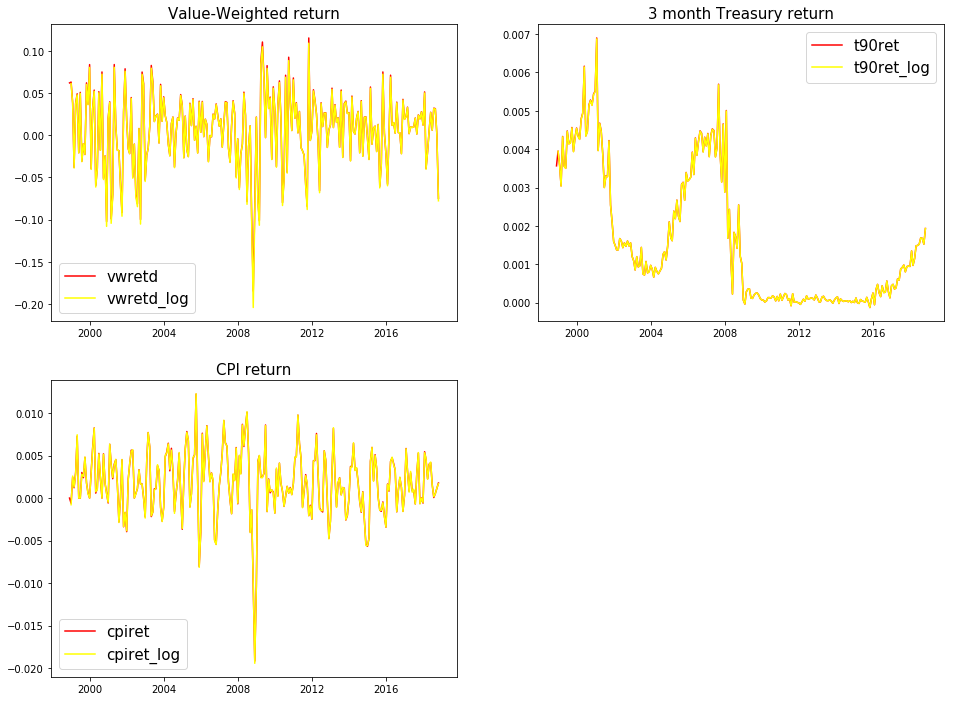

In [6]:
Assets = [q2.columns[i] for i in range(1,7)]
Statistics = ["mean"]

L = q2.iloc[1:,1:].apply(mean_)

q2_result = pd.DataFrame(L,index = Assets, columns=Statistics)
q2_result
print(q2_result)

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(2,2,1)
ax1.plot(q2["date"],q2["vwretd"],color = "red")
ax1.plot(q2["date"],q2["vwretd_log"], color = "yellow")
ax1.legend(fontsize = 15, loc="best")
ax1.set_title("Value-Weighted return", fontsize = 15)

ax2 = fig.add_subplot(2,2,2)
ax2.plot(q2["date"],q2["t90ret"],color = "red")
ax2.plot(q2["date"],q2["t90ret_log"],color = "yellow")
ax2.legend(fontsize = 15, loc="best")
ax2.set_title("3 month Treasury return", fontsize = 15)

ax3 = fig.add_subplot(2,2,3)
ax3.plot(q2["date"],q2["cpiret"],color = "red")
ax3.plot(q2["date"],q2["cpiret_log"],color = "yellow")
ax3.legend(fontsize = 15, loc="best")
ax3.set_title("CPI return", fontsize = 15)


plt.show()
plt.close(fig)


## question 3
1.T-distribution critical level at infinite df with 99% confidence level: 2.345<br>
student - t statistics:       1.780072515139707<br>
T-statistics is less than the t-distribution critical level, so we cannot reject the null hypothesis. Thus equity risk premium is not significantly positive<br>
2.Also, I calculate the average real return rate for the T-bill using the CPI index.<br>

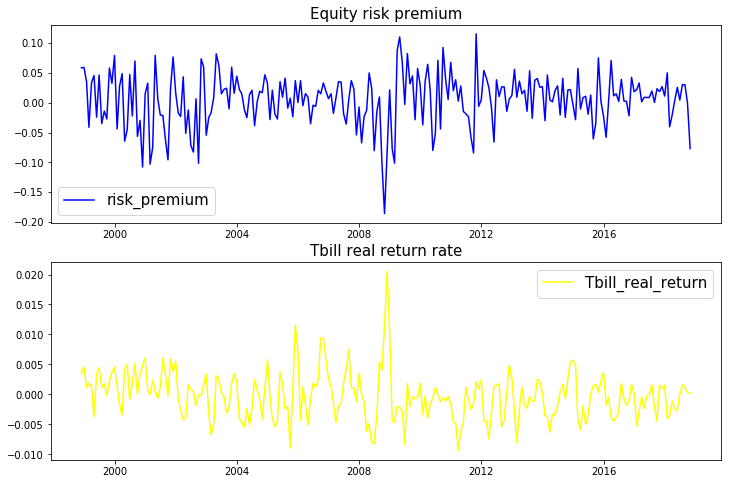

u = 0
degree of freedom = 240
t-distribution critical level at infinite df with 99% confidence level: 2.345
student - t statistics:       1.780072515139707

t-statistics is less than the t-distribution critical level, so we cannot reject the null hypothesis. Thus equity risk premium is not significantly positive

average Tbill real return rate: -0.00019919958704201767


In [7]:
# data processing
data["risk_premium"] = data["vwretd"] - data["t90ret"]
data["Tbill_real_return"] = (data["t90ret"]+1) / (data["cpiret"]+1) - 1
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2,1,1)
ax.plot(data["date"],data["risk_premium"],color = "blue")
ax.legend(fontsize = 15, loc="best")
ax.set_title("Equity risk premium", fontsize = 15)

ax2 = fig.add_subplot(2,1,2)
ax2.plot(data["date"],data["Tbill_real_return"],color = "yellow")
ax2.legend(fontsize = 15, loc="best")
ax2.set_title("Tbill real return rate", fontsize = 15)
plt.show()
plt.close(fig)

print("u = 0")
print(f"degree of freedom = {len(data['risk_premium'])}")
print(f"t-distribution critical level at infinite df with 99% confidence level: 2.345")
print(f'student - t statistics: \
      {mean_(data["risk_premium"]- 0)/std_deviation_(data["risk_premium"])*np.sqrt(len(data["risk_premium"]))}',
      end="\n\n")
print(f"t-statistics is less than the t-distribution critical level, so we cannot reject the null hypothesis. Thus equity risk premium is not significantly positive",end="\n\n")
print(f'average Tbill real return rate: {mean_(data["Tbill_real_return"])}')


## question 4
1.From the chart below, we can find that actually oil has the highest average return, thus oil is a better investment than real estate market in long run.<br>
2.Real estate market has the lowest volatility, so real estate market is safer than gold market.<br>
3.Oil market has lower sharpe ration than stock market, thus stock market performed better in the last 20 years<br>

In [8]:
q4 = data.loc[:,["house_r","oil_r","gold_r","vwretd"]]
values = ["avrg_return","volatility","sharp ratio"]
q4_value = []
for i in q4.columns:
    L = []
    L.append(mean_(q4[i]))
    L.append(std_deviation_(q4[i]))
    L.append(mean_(q4[i]-data['t90ret']) / std_deviation_(q4[i]))
    q4_value.append(L)
q4_result = pd.DataFrame(q4_value,columns=values,index = q4.columns)
q4_result

,avrg_return,volatility,sharp ratio
house_r,0.003352,0.005938,0.294993
oil_r,0.009978,0.086367,0.096995
gold_r,0.007435,0.049216,0.118551
vwretd,0.006634,0.043623,0.115387


## Question 5
1. I generate the skewness and kurtosis from question 1. Then I ploted the distribution of stock market returns.<br>
2. Jarque-Bera test statistic: 31.152305228111018<br>
It is greater than 4.61, the chi-square distribution critical value at 99% confidence level. Thus, we rejected the null hypothesis. The return of stock market doesn't follow normal distribution.

        skewness  kurtosis
vwretd -0.650342  4.193085
Jarque-Bera test statistic: 31.152305228111018


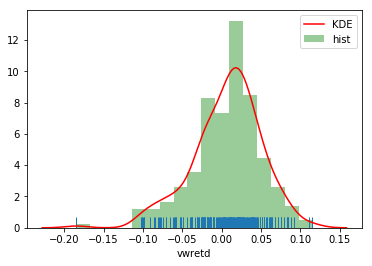

In [9]:
print(q1_result.loc[["vwretd"],["skewness","kurtosis"]])
# visualization 
sns.distplot(data["vwretd"],
             rug=True,
             hist_kws={'color':'green','label':'hist'},
             kde_kws={'color':'red','label':'KDE'})
print(f'Jarque-Bera test statistic: {JB_test_(data["vwretd"])}')


## Question 6
Based on the covariance matrix, we cannot find any value which is significantly different from zero.<br>
Based on the t(12) distribution critical value with 12 degree of freedom on 99% confidence level, the value is greater than t-statistics, which means we cannot reject the null hypothesis. We can conclude that the value is not significantly different from zero.<br>

In [12]:
def Cov_(arr1,arr2):
    """
    Parameters
    ----------
    arr1: np.array
        array of data
    arr2: np.array
        array of data
    
    Returns
    ----------
    res: float
         Covariance
    """
    x_head = mean_(arr1)
    y_head = mean_(arr2)
    res = 0
    for i in range(len(arr1)):
        res +=(arr1[i] - x_head)(arr2[i] - y_head)
    return res/(len(arr1)-1)

Stock_p = data["vwretd"]
q6_value = [Stock_p.shift(i) for i in range(13)]
q6_data = pd.DataFrame(q6_value).T.iloc[12:,]
q6_data = q6_data.reset_index().drop("index",axis =1)
q6_data.columns = ["lag_"+str(i) for i  in range(13)]
CovMatrix = np.cov(q6_data,rowvar= False) 
CovMatrix = pd.DataFrame(CovMatrix,index = q6_data.columns,columns=q6_data.columns)
CovMatrix

,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
lag_0,1.913318e-03,0.000231,-0.000092,0.000122,0.000184,1.753828e-07,-0.000143,-0.000020,0.000164,-0.000175,-0.000013,0.000089,0.000022
lag_1,2.309853e-04,0.001898,0.000222,-0.000087,0.000122,1.952100e-04,0.000001,-0.000133,-0.000022,0.000137,-0.000151,0.000003,0.000110
lag_2,-9.218982e-05,0.000222,0.001902,0.000224,-0.000082,1.161478e-04,0.000199,-0.000004,-0.000138,-0.000017,0.000134,-0.000159,-0.000004
lag_3,1.217280e-04,-0.000087,0.000224,0.001900,0.000224,-8.498212e-05,0.000116,0.000196,-0.000004,-0.000129,-0.000024,0.000129,-0.000165
lag_4,1.842119e-04,0.000122,-0.000082,0.000224,0.001903,2.169190e-04,-0.000083,0.000109,0.000194,0.000009,-0.000140,-0.000034,0.000118
lag_5,1.753828e-07,0.000195,0.000116,-0.000085,0.000217,1.912019e-03,0.000212,-0.000075,0.000115,0.000185,0.000015,-0.000129,-0.000023
lag_6,-1.431460e-04,0.000001,0.000199,0.000116,-0.000083,2.116440e-04,0.001913,0.000207,-0.000076,0.000125,0.000177,0.000008,-0.000137
lag_7,-2.043343e-05,-0.000133,-0.000004,0.000196,0.000109,-7.455606e-05,0.000207,0.001921,0.000213,-0.000085,0.000131,0.000188,0.000018
lag_8,1.644182e-04,-0.000022,-0.000138,-0.000004,0.000194,1.150671e-04,-0.000076,0.000213,0.001923,0.000201,-0.000075,0.000139,0.000198
lag_9,-1.754027e-04,0.000137,-0.000017,-0.000129,0.000009,1.852129e-04,0.000125,-0.000085,0.000201,0.001922,0.000204,-0.000085,0.000133


In [18]:
temp = CovMatrix.iloc[0,1:]
t_12 = temp.dot(temp)*240
t_12

4.7499244464231004e-05

## Question 7
Based on the result, we can find the values in 100 simulations.<br>
1.There are only 18 times of loss under normal distribution assumption.<br>
There are 29 times when stock market was worse than Tbill under normal distribution assumption.<br>
2.There are 68 times of loss under t(3) distribution assumption.<br>
There are 69 times when stock market was worse than Tbill under t(3) distribution assumption.<br>
3.It depends on the assumption and distribution of returns. If it is normal distribution, the advice makes sense. If it is t(3) distribution, it doesn't make sense.<br>

In [317]:
Rf = 0.04
Tbill = (1+Rf)**5
print(f"Tbill: {Tbill}")
mu, sigma = 0.1, 0.2
df = 3
normal_stock = 0
normal_tbill = 0
t_dist_stock = 0
t_dist_tbill = 0
L1 , L2 = [],[]
for i in range(100):
    n1 = (1+np.random.normal(mu,sigma,size = 5)).prod()
    n2 = (1+np.random.standard_t(df,size = 5)).prod()
    L1.append(n1)
    L2.append(n2)
    if n1 < 1:
        normal_stock += 1
    if n1 < Tbill:
        normal_tbill += 1
    if n2 < 1:
        t_dist_stock += 1
    if n2 < Tbill:
        t_dist_tbill += 1
print(normal_stock,normal_tbill,t_dist_stock,t_dist_tbill)

Tbill: 1.2166529024000001
12 31 73 75


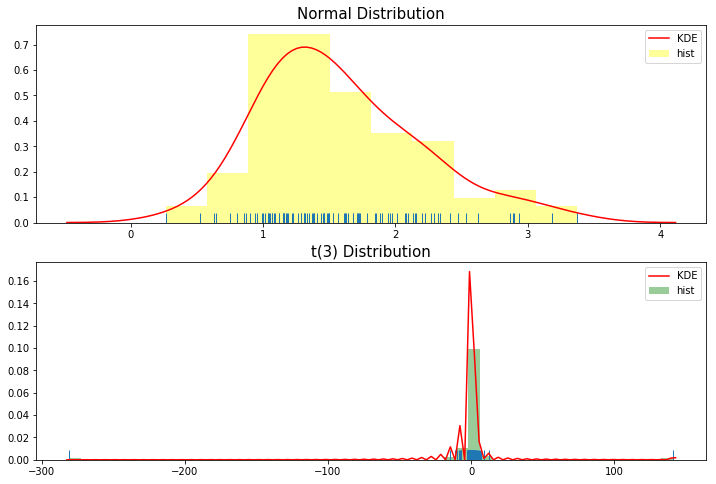

In [366]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2,1,1)
sns.distplot(L1,rug=True,hist_kws={'color':'yellow','label':'hist'},kde_kws={'color':'red','label':'KDE'})
#ax.plot(Tbill,np.linspace(0, 1, 5),color = "blue",sizes=1000)
ax.legend(fontsize = 10, loc="best")
ax.set_title("Normal Distribution", fontsize = 15)


ax2 = fig.add_subplot(2,1,2)
sns.distplot(L2,rug=True,hist_kws={'color':'green','label':'hist'},kde_kws={'color':'red','label':'KDE'})
ax2.legend(fontsize = 10, loc="best")
ax2.set_title("t(3) Distribution", fontsize = 15)

plt.show()
plt.close(fig)

## Question 8
Based on the bootstrap method, we can the scenario is quite similar to it under normal distribution.<br>
There are only 16 times of loss.<br>
There are 3 times when stock market was worse than Tbill.<br>

In [368]:
res1 = 0
res2 = 0
L3 = []
for i in range(100):
    n = (data["vwretd"].sample(n=60, replace =False)+1).prod()
    L3.append(n)
    if n < 1:
        res1 +=1
    if n < Tbill:
        res2 +=1
print(f"Tbill: {Tbill}")
print(res1,res2)

Tbill: 1.2166529024000001
8 31


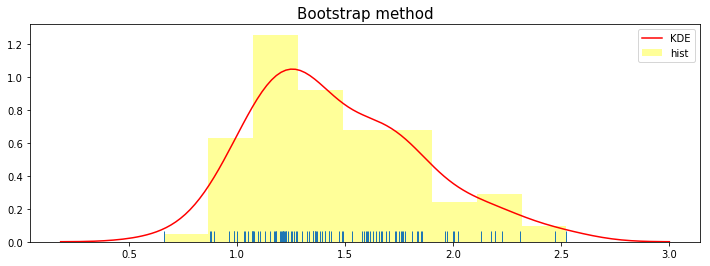

In [371]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
sns.distplot(L3,rug=True,hist_kws={'color':'yellow','label':'hist'},kde_kws={'color':'red','label':'KDE'})
#ax.plot(Tbill,np.linspace(0, 1, 5),color = "blue",sizes=1000)
ax.legend(fontsize = 10, loc="best")
ax.set_title("Bootstrap method", fontsize = 15)
plt.show()
plt.close(fig)